In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import jax
import jax.numpy as jnp
import numpy as np
import gymnax
from minatar import Environment

import matplotlib.pyplot as plt

# Asterix MinAtar Environment

In [ ]:
# 2D State Space, 3D Obs Space, 1D Action Space [Continuous - Torque]
rng, reset, step, env_params = gymnax.make("Asterix-MinAtar")
rng, key_reset, key_step = jax.random.split(rng, 3)
obs, state = reset(key_reset, env_params)

In [ ]:
fig, axs = plt.subplots(2, 3)
for i in range(5):
    axs.flatten()[i].imshow(obs[:, :, i])

In [ ]:
obs.shape, state

In [ ]:
env = Environment("asterix")
obs = env.reset()
action = 1
reward_gym, done_gym = env.act(action)
obs_gym = env.state()
reward_gym, done_gym, obs_gym.shape

In [ ]:
state

In [ ]:
obs_jax, state_jax, reward_jax, done_jax, _ = step(key_step, env_params,
                                                   state, action)
state_jax, reward_jax, done_jax

# Breakout MinAtar Environment

In [ ]:
env = Environment("breakout", sticky_action_prob =0.0)
env.reset()
obs_gym = env.state()

In [ ]:
state = {'ball_dir': env.env.ball_dir,
         'ball_x': env.env.ball_x,
         'ball_y': env.env.ball_y,
         'brick_map': env.env.brick_map,
         'last_x': env.env.last_x,
         'last_y': env.env.last_y,
         'pos': env.env.pos,
         'strike': env.env.strike,
         'terminal': env.env.terminal}

In [ ]:
action = 1
reward_gym, done_gym = env.act(action)
next_obs_gym = env.state()
reward_gym, done_gym, obs_gym.shape

In [ ]:
# 2D State Space, 3D Obs Space, 1D Action Space [Continuous - Torque]
rng, reset, step, env_params = gymnax.make("Breakout-MinAtar")
rng, key_reset, key_step = jax.random.split(rng, 3)
o, s = reset(key_reset, env_params)

In [ ]:
obs_jax, state_jax, reward_jax, done_jax, _ = step(key_step, env_params,
                                                   state, action)
state_jax, reward_jax, done_jax

In [ ]:
(obs_jax == next_obs_gym).all()

In [ ]:
seed = 3
env = Environment("breakout", sticky_action_prob =0.0, random_seed=seed)
env.reset()
np.random.seed(seed)
action_space = [1, 3]
for i in range(10):
    # print("pos gym pre", env.env.pos)
    state_jax = {'ball_dir': env.env.ball_dir,
                 'ball_x': env.env.ball_x,
                 'ball_y': env.env.ball_y,
                 'brick_map': env.env.brick_map,
                 'last_x': env.env.last_x,
                 'last_y': env.env.last_y,
                 'pos': env.env.pos,
                 'strike': env.env.strike,
                 'terminal': env.env.terminal}
    action = np.random.choice(action_space)
    #print("gym_pre", env.env.ball_x, env.env.ball_y , env.env.pos)
    reward_gym, done_gym = env.act(action)
    #print("pos gym post", env.env.pos, print(done_gym))
    next_obs_gym = env.state()
    #print("gym_post", env.env.ball_x, env.env.ball_y , env.env.pos)
    
    obs_jax, state_jax, reward_jax, done_jax, _ = step(key_step, env_params,
                                                       state_jax, action)
    #print(done_jax)
    
    #print(i, "==========")
    if not (obs_jax == next_obs_gym).all():
        print("===")
        print("Problem")
        for i in range(4):
            print((obs_jax[:, :, i] == next_obs_gym[:, :, i]).all())
        break
    if done_gym:
        break
    

In [ ]:
(obs_jax[:, :, 1] == next_obs_gym[:, :, 1]).all()

In [ ]:
fig, axs = plt.subplots(2, 2)
for i in range(4):
    axs.flatten()[i].imshow(next_obs_gym[:, :, i])

In [ ]:
fig, axs = plt.subplots(2, 2)
for i in range(4):
    axs.flatten()[i].imshow(obs_jax[:, :, i])

# Freeway MinAtar Environment

In [2]:
# 2D State Space, 3D Obs Space, 1D Action Space [Continuous - Torque]
rng, reset, step, env_params = gymnax.make("Freeway-MinAtar")
rng, key_reset, key_step = jax.random.split(rng, 3)
obs, state = reset(key_reset, env_params)

In [3]:
env_params

{'player_speed': 3, 'time_limit': 2500}

In [4]:
state

{'cars': DeviceArray([[ 0,  1,  1,  1],
              [ 0,  2,  5,  5],
              [ 0,  3,  3, -3],
              [ 0,  4,  5,  5],
              [ 0,  5,  1,  1],
              [ 0,  6,  5, -5],
              [ 0,  7,  3, -3],
              [ 0,  8,  1,  1]], dtype=int32),
 'move_timer': DeviceArray(3, dtype=int32),
 'pos': DeviceArray(9, dtype=int32),
 'terminal': DeviceArray(False, dtype=bool),
 'terminate_timer': DeviceArray(2500, dtype=int32)}

In [5]:
obs

DeviceArray([[[False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False]],

             [[False,  True, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, False, False, False, False, False, False],
              [False, F

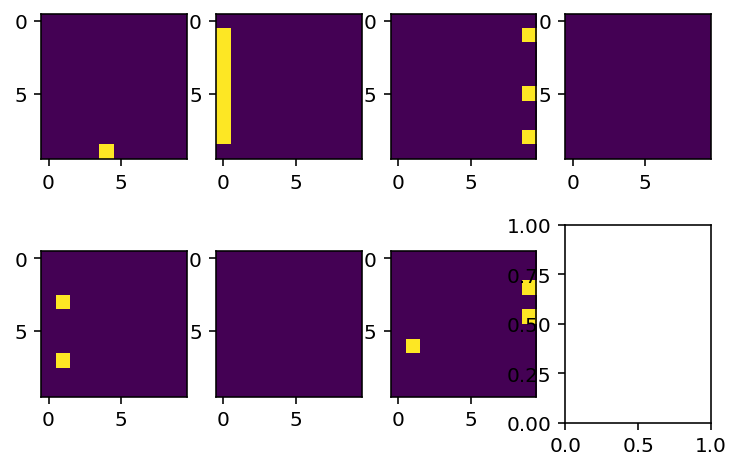

In [8]:
fig, axs = plt.subplots(2, 4)
for i in range(7):
    axs.flatten()[i].imshow(obs[:, :, i])